# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.003
-0.002
-0.002
-0.003
-0.003
-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.003
0.0
0.0
0.0
0.0
0.001
0.001
0.0
0.0
0.0
-0.004
0.0
-0.002
0.0
-0.004
-0.003
0.983
0.984
0.986
0.985
0.984
1.968
1.97
1.971
1.97
1.97
2.952
2.954
2.954
2.953
2.953
3.94
3.939
3.938
3.937
4.916
4.918
4.919
4.919
4.918
5.9
5.902
5.904
5.902
5.904
6.713
6.713
6.711
6.712
7.52
7.52
7.52
7.52
8.517
8.516
8.515
8.514
8.514
9.499
9.501
9.504
9.502
9.502
10.492
10.495
10.5
10.498
10.499
11.476
11.48
11.478
11.477
11.477
12.493
12.492
12.49
12.49
13.5
13.5
13.5
14.178
14.178
14.177
14.176
14.848
14.851
14.853
14.852
14.852
15.842
15.842
15.836
15.841
16.85
16.85
16.85
16.85
17.838
17.838
17.836
17.837
18.82
18.823
18.825
18.823
18.824
19.807
19.805
19.804
19.805
20.815
20.814
20.813
21.374
21.374
21.374
21.929
21.929
21.929
22.915
22.914
22.913
22.912
23.922
23.922
23.922
23.922
24.929
24.929
24.929
25.939
25.939
25.939
26.949
26.949
2

57.527
57.527
57.526
57.526
57.527
57.527
57.527
57.527
57.527
57.526
57.526
57.526
57.526
57.526
57.526
57.526
57.524
57.524
57.524
57.524
57.548
57.573
57.608
57.646
57.684
57.684
57.684
57.684
57.684
57.684
57.684
57.684
57.683
57.683
57.682
57.682
57.682
57.681
57.681
57.681
57.68
57.682
57.683
57.682
57.682
57.682
57.68
57.68
57.68
57.679
57.679
57.68
57.68
57.679
57.679
57.678
57.678
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.677
57.675
57.674
57.674
57.675
57.699
57.729
57.762
57.799
57.836
57.868
57.874
57.869
57.868
57.868
57.87
57.87
57.87
57.87
57.868
57.869
57.869
57.869
57.869
57.869
57.868
57.87
57.87
57.868
57.867
57.867
57.867
57.867
57.867
57.866
57.866
57.866
57.866
57.866
57.865
57.865
57.865
57.865
57.865
57.865
57.864
57.864
57.864
57.864
57.864
57.864
57.863
57.863
57.863
57.864
57.864
57.864
57.865
57.865
57.863
57.862
57.861
57.864
57.864
57.862
57.894
57.93
57.969
58.004
58.042
58.079
58.118
58.11

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1592,3184,60.180
1593,3186,60.180
1594,3188,60.176
1595,3190,60.177


<IPython.core.display.Javascript object>


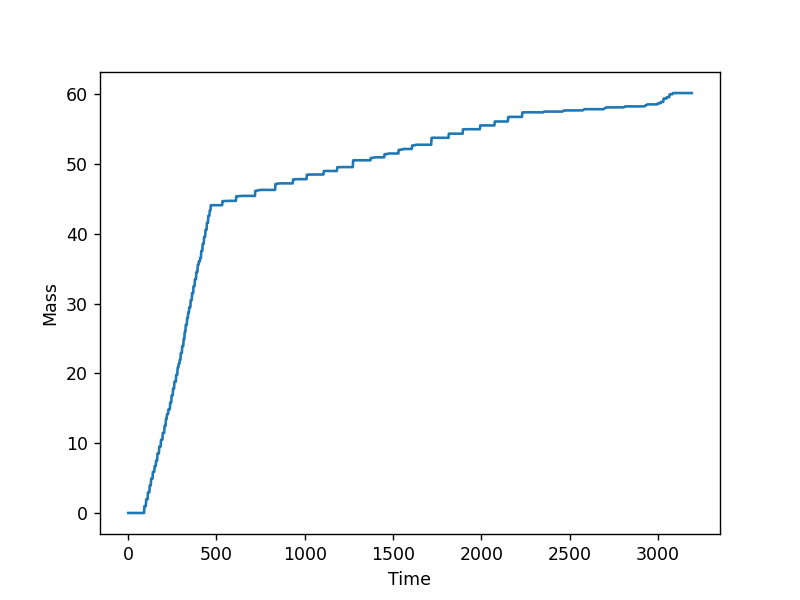

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_280223_S115-120.csv')